In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r'C:\Users\divya\OneDrive\Desktop\fraud_detection1\onlinefraud.csv')

In [5]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [8]:
df['step'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95])

In [9]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df.shape

(1048575, 11)

In [11]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [12]:
type=df['type'].value_counts()

In [13]:
transaction=type.index

In [14]:
results=type.values

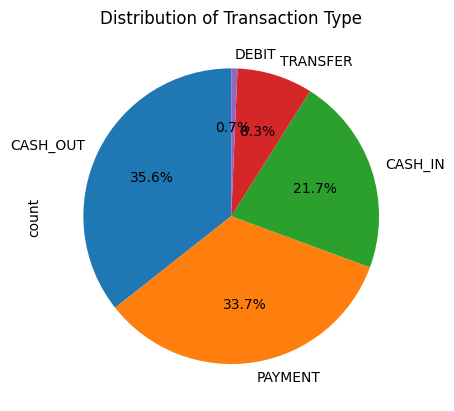

In [15]:
import matplotlib.pyplot as plt


df['type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, title="Distribution of Transaction Type")
plt.show()

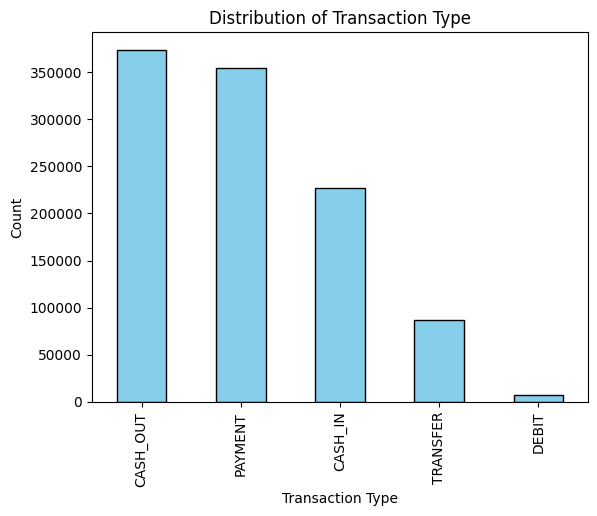

In [16]:
import matplotlib.pyplot as plt

# Plotting the bar graph
df['type'].value_counts().plot.bar(
    color='skyblue',
    edgecolor='black',
    title="Distribution of Transaction Type"
)

# Adding labels to the axes
plt.xlabel('Transaction Type')
plt.ylabel('Count')

# Display the chart
plt.show()


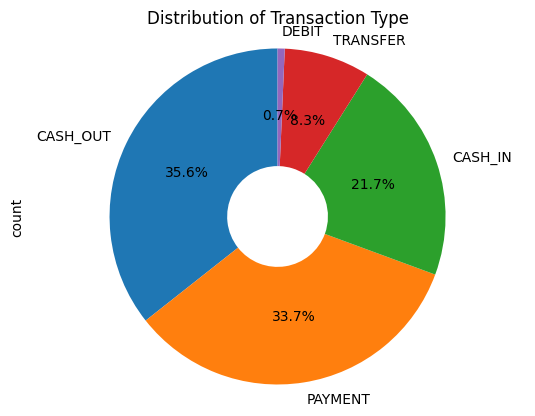

In [17]:
import matplotlib.pyplot as plt

# Plotting the pie chart with a hole in the center
df['type'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    title="Distribution of Transaction Type",
    wedgeprops={'width': 0.7}  # This creates a hole with 0.4 width
)

# Ensuring the pie chart is a circle
plt.axis('equal')

# Display the chart
plt.show()


In [18]:
df=df.dropna()


In [19]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [20]:
df.replace(to_replace=['CASH_OUT', 'TRANSFER', 'PAYMENT', 'DEBIT', 'CASH_IN'],value=[2,4,1,5,3],inplace=True)

C:\Users\divya\AppData\Local\Temp\ipykernel_49320\3884331588.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(to_replace=['CASH_OUT', 'TRANSFER', 'PAYMENT', 'DEBIT', 'CASH_IN'],value=[2,4,1,5,3],inplace=True)


In [21]:
type

type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: count, dtype: int64

In [22]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,2,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,2,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,1,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,1,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,1,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [23]:
df['isFraud']=df['isFraud'].map({0:'No Fraud',1:'Fraud'})
     

In [24]:
df


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,No Fraud,0
1,1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,No Fraud,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,Fraud,0
3,1,2,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,Fraud,0
4,1,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,No Fraud,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,2,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,No Fraud,0
1048571,95,1,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,No Fraud,0
1048572,95,1,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,No Fraud,0
1048573,95,1,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,No Fraud,0


In [25]:
x=df[['type','amount','oldbalanceOrg','newbalanceOrig']]

In [26]:
y=df.iloc[:,-2]


In [27]:

y

0          No Fraud
1          No Fraud
2             Fraud
3             Fraud
4          No Fraud
             ...   
1048570    No Fraud
1048571    No Fraud
1048572    No Fraud
1048573    No Fraud
1048574    No Fraud
Name: isFraud, Length: 1048575, dtype: object

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [29]:
model=LogisticRegression

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)
     

In [31]:
model=DecisionTreeClassifier()

In [32]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [33]:
model.score(xtest,ytest)*100

99.94897837541426

In [34]:
model.predict([[2,9839.64,26,0,]])

C:\Users\divya\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['No Fraud'], dtype=object)

In [35]:
model.predict([[4,181,181,0]])

C:\Users\divya\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Fraud'], dtype=object)

In [36]:
x

,type,amount,oldbalanceOrg,newbalanceOrig
0,1,9839.64,170136.00,160296.36
1,1,1864.28,21249.00,19384.72
2,4,181.00,181.00,0.00
3,2,181.00,181.00,0.00
4,1,11668.14,41554.00,29885.86
...,...,...,...,...
1048570,2,132557.35,479803.00,347245.65
1048571,1,9917.36,90545.00,80627.64
1048572,1,14140.05,20545.00,6404.95
1048573,1,10020.05,90605.00,80584.95


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [38]:
models=[]
results=[]
names=[]

In [39]:

models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))


In [40]:

models

[('LR', LogisticRegression()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC())]

In [41]:
import pickle

with open('fraud_detection_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file, protocol=2)